In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy as sp 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive


In [ ]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/msc project dataset 2022/dailyactivitytotal.csv')

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366    4/12/2022       13162       8.500000         8.500000   
1    1503960366    4/13/2022       10735       6.970000         6.970000   
2    1503960366    4/14/2022       10460       6.740000         6.740000   
3    1503960366    4/15/2022        9762       6.280000         6.280000   
4    1503960366    4/16/2022       12669       8.160000         8.160000   
..          ...          ...         ...            ...              ...   
935  8877689391     5/8/2022       10686       8.110000         8.110000   
936  8877689391     5/9/2022       20226      18.250000        18.250000   
937  8877689391    5/10/2022       10733       8.150000         8.150000   
938  8877689391    5/11/2022       21420      19.559999        19.559999   
939  8877689391    5/12/2022        8064       6.120000         6.120000   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                         0.0                1.88                      0.55   
1                         0.0                1.57                      0.69   
2                         0.0                2.44                      0.40   
3                         0.0                2.14                      1.26   
4                         0.0                2.71                      0.41   
..                        ...                 ...                       ...   
935                       0.0                1.08                      0.20   
936                       0.0               11.10                      0.80   
937                       0.0                1.35                      0.46   
938                       0.0               13.22                      0.41   
939                       0.0                1.82                      0.04   

     LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                   6.06                     0.00                 25   
1                   4.71                     0.00                 21   
2                   3.91                     0.00                 30   
3                   2.83                     0.00                 29   
4                   5.04                     0.00                 36   
..                   ...                      ...                ...   
935                 6.80                     0.00                 17   
936                 6.24                     0.05                 73   
937                 6.28                     0.00                 18   
938                 5.89                     0.00                 88   
939                 4.25                     0.00                 23   

     FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  
0                     13                   328               728      1985  
1                     19                   217               776      1797  
2                     11                   181              1218      1776  
3                     34                   209               726      1745  
4                     10                   221               773      1863  
..                   ...                   ...               ...       ...  
935                    4                   245              1174      2847  
936                   19                   217              1131      3710  
937                   11                   224              1187      2832  
938                   12                   213              1127      3832  
939                    1                   137               770      1849  

[940 rows x 15 columns]

In [ ]:
df_total = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/msc project dataset 2022/dailyactivitytotal.csv')
df_total.head(1000)

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366    4/12/2022       13162       8.500000         8.500000   
1    1503960366    4/13/2022       10735       6.970000         6.970000   
2    1503960366    4/14/2022       10460       6.740000         6.740000   
3    1503960366    4/15/2022        9762       6.280000         6.280000   
4    1503960366    4/16/2022       12669       8.160000         8.160000   
..          ...          ...         ...            ...              ...   
935  8877689391     5/8/2022       10686       8.110000         8.110000   
936  8877689391     5/9/2022       20226      18.250000        18.250000   
937  8877689391    5/10/2022       10733       8.150000         8.150000   
938  8877689391    5/11/2022       21420      19.559999        19.559999   
939  8877689391    5/12/2022        8064       6.120000         6.120000   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                         0.0                1.88                      0.55   
1                         0.0                1.57                      0.69   
2                         0.0                2.44                      0.40   
3                         0.0                2.14                      1.26   
4                         0.0                2.71                      0.41   
..                        ...                 ...                       ...   
935                       0.0                1.08                      0.20   
936                       0.0               11.10                      0.80   
937                       0.0                1.35                      0.46   
938                       0.0               13.22                      0.41   
939                       0.0                1.82                      0.04   

     LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                   6.06                     0.00                 25   
1                   4.71                     0.00                 21   
2                   3.91                     0.00                 30   
3                   2.83                     0.00                 29   
4                   5.04                     0.00                 36   
..                   ...                      ...                ...   
935                 6.80                     0.00                 17   
936                 6.24                     0.05                 73   
937                 6.28                     0.00                 18   
938                 5.89                     0.00                 88   
939                 4.25                     0.00                 23   

     FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  
0                     13                   328               728      1985  
1                     19                   217               776      1797  
2                     11                   181              1218      1776  
3                     34                   209               726      1745  
4                     10                   221               773      1863  
..                   ...                   ...               ...       ...  
935                    4                   245              1174      2847  
936                   19                   217              1131      3710  
937                   11                   224              1187      2832  
938                   12                   213              1127      3832  
939                    1                   137               770      1849  

[940 rows x 15 columns]

In [ ]:
df_total.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

Checking missing values

In [ ]:
total=df_total.isnull().sum().sort_values(ascending=False)
print(total)

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


In [ ]:
df_total.describe().transpose()

count          mean           std           min  \
Id                        940.0  4.855407e+09  2.424805e+09  1.503960e+09   
TotalSteps                940.0  7.637911e+03  5.087151e+03  0.000000e+00   
TotalDistance             940.0  5.489702e+00  3.924606e+00  0.000000e+00   
TrackerDistance           940.0  5.475351e+00  3.907276e+00  0.000000e+00   
LoggedActivitiesDistance  940.0  1.081709e-01  6.198965e-01  0.000000e+00   
VeryActiveDistance        940.0  1.502681e+00  2.658941e+00  0.000000e+00   
ModeratelyActiveDistance  940.0  5.675426e-01  8.835803e-01  0.000000e+00   
LightActiveDistance       940.0  3.340819e+00  2.040655e+00  0.000000e+00   
SedentaryActiveDistance   940.0  1.606383e-03  7.346176e-03  0.000000e+00   
VeryActiveMinutes         940.0  2.116489e+01  3.284480e+01  0.000000e+00   
FairlyActiveMinutes       940.0  1.356489e+01  1.998740e+01  0.000000e+00   
LightlyActiveMinutes      940.0  1.928128e+02  1.091747e+02  0.000000e+00   
SedentaryMinutes          940.0  9.912106e+02  3.012674e+02  0.000000e+00   
Calories                  940.0  2.303610e+03  7.181669e+02  0.000000e+00   

                                   25%           50%           75%  \
Id                        2.320127e+09  4.445115e+09  6.962181e+09   
TotalSteps                3.789750e+03  7.405500e+03  1.072700e+04   
TotalDistance             2.620000e+00  5.245000e+00  7.712500e+00   
TrackerDistance           2.620000e+00  5.245000e+00  7.710000e+00   
LoggedActivitiesDistance  0.000000e+00  0.000000e+00  0.000000e+00   
VeryActiveDistance        0.000000e+00  2.100000e-01  2.052500e+00   
ModeratelyActiveDistance  0.000000e+00  2.400000e-01  8.000000e-01   
LightActiveDistance       1.945000e+00  3.365000e+00  4.782500e+00   
SedentaryActiveDistance   0.000000e+00  0.000000e+00  0.000000e+00   
VeryActiveMinutes         0.000000e+00  4.000000e+00  3.200000e+01   
FairlyActiveMinutes       0.000000e+00  6.000000e+00  1.900000e+01   
LightlyActiveMinutes      1.270000e+02  1.990000e+02  2.640000e+02   
SedentaryMinutes          7.297500e+02  1.057500e+03  1.229500e+03   
Calories                  1.828500e+03  2.134000e+03  2.793250e+03   

                                   max  
Id                        8.877689e+09  
TotalSteps                3.601900e+04  
TotalDistance             2.803000e+01  
TrackerDistance           2.803000e+01  
LoggedActivitiesDistance  4.942142e+00  
VeryActiveDistance        2.192000e+01  
ModeratelyActiveDistance  6.480000e+00  
LightActiveDistance       1.071000e+01  
SedentaryActiveDistance   1.100000e-01  
VeryActiveMinutes         2.100000e+02  
FairlyActiveMinutes       1.430000e+02  
LightlyActiveMinutes      5.180000e+02  
SedentaryMinutes          1.440000e+03  
Calories                  4.900000e+03

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


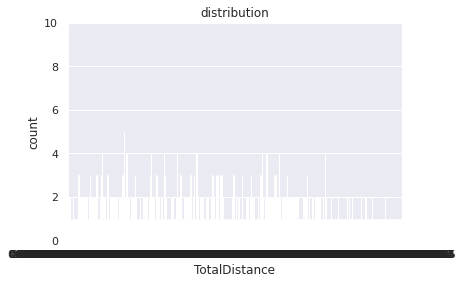

In [ ]:
sns.countplot(df_total['TotalDistance']).set_title('distribution')
plt.ylim(0,10)
plt.show()

In [ ]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


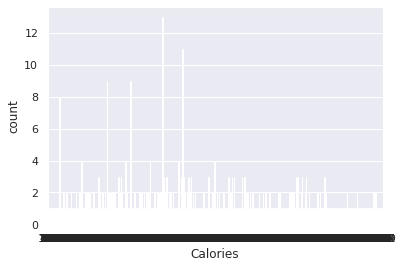

In [ ]:
sns.countplot(df_total['Calories'])
plt.show()

ALGORITHM


Iteration: 2 f([[ 0.37503 -1.05396]]) = 1.25147
Iteration: 3 f([[0.23005 0.82428]]) = 0.73237
Iteration: 4 f([[0.26438 0.07944]]) = 0.07621
Iteration: 8 f([[ 0.20208 -0.06604]]) = 0.04520
Iteration: 10 f([[0.04366 0.03999]]) = 0.00351
Iteration: 11 f([[-0.05228  0.02766]]) = 0.00350
Iteration: 13 f([[-0.01299 -0.00413]]) = 0.00019
Iteration: 15 f([[-0.00558 -0.00146]]) = 0.00003
Iteration: 19 f([[1.00e-05 1.04e-03]]) = 0.00000
Iteration: 23 f([[ 9.e-05 -2.e-05]]) = 0.00000
Iteration: 29 f([[-4.e-05 -2.e-05]]) = 0.00000
Iteration: 33 f([[2.e-05 1.e-05]]) = 0.00000
Iteration: 36 f([[ 1.e-05 -1.e-05]]) = 0.00000
Iteration: 37 f([[-1.e-05 -0.e+00]]) = 0.00000
Iteration: 39 f([[0. 0.]]) = 0.00000
Iteration: 44 f([[0. 0.]]) = 0.00000
Iteration: 46 f([[ 0. -0.]]) = 0.00000
Iteration: 49 f([[ 0. -0.]]) = 0.00000
Iteration: 50 f([[0. 0.]]) = 0.00000
Iteration: 51 f([[ 0. -0.]]) = 0.00000
Iteration: 53 f([[-0. -0.]]) = 0.00000
Iteration: 55 f([[-0.  0.]]) = 0.00000
Iteration: 56 f([[-0. -0.]]) =

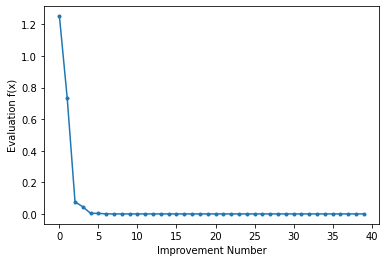

In [1]:
from numpy.random import rand
from numpy.random import choice
from numpy import asarray
from numpy import clip
from numpy import argmin
from numpy import min
from numpy import around
from matplotlib import pyplot
import numpy as np
 
 

def obj(x):
    return x[0]**2.0 + x[1]**2.0

    #sum = -20. * np.exp(-0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))) - np.exp(0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))) + 20. + np.e
    #return sum
 
 

def mutation(x, F):
    return x[0] + F * (x[1] - x[2])
 
def check_bounds(mutated, bounds):
    mutated_bound = [clip(mutated[i], bounds[i, 0], bounds[i, 1]) for i in range(len(bounds))]
    return mutated_bound
 
 

def crossover(mutated, target, dims, cr):
  
    p = rand(dims)
    trial = [mutated[i] if p[i] < cr else target[i] for i in range(dims)]
    return trial
 
def differential_evolution(pop_size, bounds, iter, F, cr):
    pop = bounds[:, 0] + (rand(pop_size, len(bounds)) * (bounds[:, 1] - bounds[:, 0]))
    obj_all = [obj(ind) for ind in pop]
    best_vector = pop[argmin(obj_all)]
    best_obj = min(obj_all)
    prev_obj = best_obj
    obj_iter = list()
    for i in range(iter):
             for j in range(pop_size):
                candidates = [candidate for candidate in range(pop_size) if candidate != j]
                a, b, c = pop[choice(candidates, 3, replace=False)]
                mutated = mutation([a, b, c], F)
                mutated = check_bounds(mutated, bounds)
                trial = crossover(mutated, pop[j], len(bounds), cr)
                obj_target = obj(pop[j])
                obj_trial = obj(trial)
                if obj_trial < obj_target:
                    pop[j] = trial
                    obj_all[j] = obj_trial
             best_obj = min(obj_all)
             if best_obj < prev_obj:
              best_vector = pop[argmin(obj_all)]
              prev_obj = best_obj
              obj_iter.append(best_obj)
              print('Iteration: %d f([%s]) = %.5f' % (i, around(best_vector, decimals=5), best_obj))
    return [best_vector, best_obj, obj_iter]
 

pop_size = 10
bounds = asarray([(-5.0, 5.0), (-5.0, 5.0)])
iter = 100
F = 0.5
cr = 0.7
 
solution = differential_evolution(pop_size, bounds, iter, F, cr)
print('Done!')
print('\nSolution: f([%s]) = %.5f' % (around(solution[0], decimals=5), solution[1]))
 
pyplot.plot(solution[2], '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation f(x)')
pyplot.show()

In [2]:
from numpy.random import randint
from numpy.random import rand

def objective(x):
	return x[0]**2.0 + x[1]**2.0

def decode(bounds, n_bits, bitstring):
	decoded = list()
	largest = 2**n_bits
	for i in range(len(bounds)):
			start, end = i * n_bits, (i * n_bits)+n_bits
			substring = bitstring[start:end]
			chars = ''.join([str(s) for s in substring])
			integer = int(chars, 2)
			value = bounds[i][0] + (integer/largest) * (bounds[i][1] - bounds[i][0])
			decoded.append(value)
	return decoded

def selection(pop, scores, k=3):
	selection_ix = randint(len(pop))
	for ix in randint(0, len(pop), k-1):
			if scores[ix] < scores[selection_ix]:
				selection_ix = ix
	return pop[selection_ix]

def crossover(p1, p2, r_cross):
	c1, c2 = p1.copy(), p2.copy()
	if rand() < r_cross:
			pt = randint(1, len(p1)-2)
			c1 = p1[:pt] + p2[pt:]
			c2 = p2[:pt] + p1[pt:]
	return [c1, c2]

def mutation(bitstring, r_mut):
	for i in range(len(bitstring)):
				if rand() < r_mut:
					bitstring[i] = 1 - bitstring[i]

def genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut):
	pop = [randint(0, 2, n_bits*len(bounds)).tolist() for _ in range(n_pop)]
	best, best_eval = 0, objective(decode(bounds, n_bits, pop[0]))
	for gen in range(n_iter):
		decoded = [decode(bounds, n_bits, p) for p in pop]
		scores = [objective(d) for d in decoded]
		for i in range(n_pop):
			if scores[i] < best_eval:
				best, best_eval = pop[i], scores[i]
				print(">%d, iteration f(%s) = %f" % (gen,  decoded[i], scores[i]))
		selected = [selection(pop, scores) for _ in range(n_pop)]
		children = list()
		for i in range(0, n_pop, 2):
			p1, p2 = selected[i], selected[i+1]
			for c in crossover(p1, p2, r_cross):
				mutation(c, r_mut)
				children.append(c)
			pop = children
	return [best, best_eval]

bounds = [[-5.0, 5.0], [-5.0, 5.0]]
n_iter = 100
n_bits = 16
n_pop = 100
r_cross = 0.9
r_mut = 1.0 / (float(n_bits) * len(bounds))
best, score = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

>0, iteration f([-1.51214599609375, -0.866851806640625]) = 3.038018
>0, iteration f([-0.364227294921875, 1.629638671875]) = 2.788384
>0, iteration f([0.101318359375, -1.022491455078125]) = 1.055754
>0, iteration f([-0.551605224609375, 0.3997802734375]) = 0.464093
>1, iteration f([-0.548858642578125, 0.059661865234375]) = 0.304805
>1, iteration f([-0.168609619140625, -0.496826171875]) = 0.275265
>1, iteration f([-0.239105224609375, 0.3997802734375]) = 0.216996
>2, iteration f([0.111083984375, -0.12725830078125]) = 0.028534
>3, iteration f([0.003662109375, 0.10894775390625]) = 0.011883
>6, iteration f([0.01708984375, 0.01251220703125]) = 0.000449
>8, iteration f([0.0164794921875, 0.000152587890625]) = 0.000272
>10, iteration f([0.0067138671875, 0.01373291015625]) = 0.000234
>11, iteration f([0.001983642578125, 0.013275146484375]) = 0.000180
>12, iteration f([0.0042724609375, 0.01129150390625]) = 0.000146
>13, iteration f([0.0042724609375, 0.01007080078125]) = 0.000120
>14, iteration f([0


DISTPLOT OF **CALORIES** 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


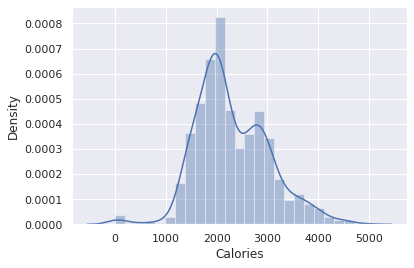

In [ ]:
fig1=sns.distplot(df_total['Calories'])
plt.show()

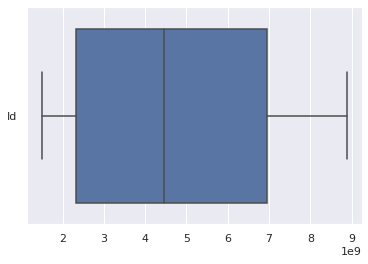

In [ ]:
data1=['Id','ActivityDate']
ax=sns.boxplot(data=df_total[data1],orient='h')

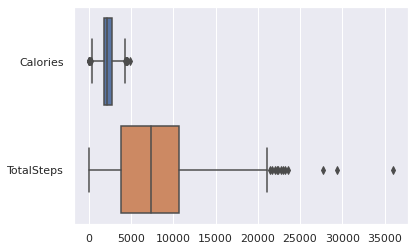

In [ ]:
data2=['Calories','TotalSteps']
ax=sns.boxplot(data=df_total[data2],orient='h')

In [ ]:
df_calories=df_total['Calories']
df_calories.shape

(940,)

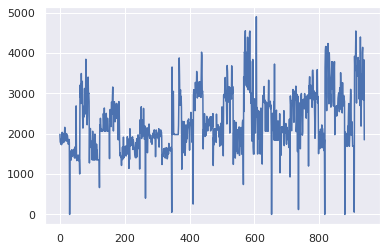

In [ ]:
plt.plot(df_calories)
        

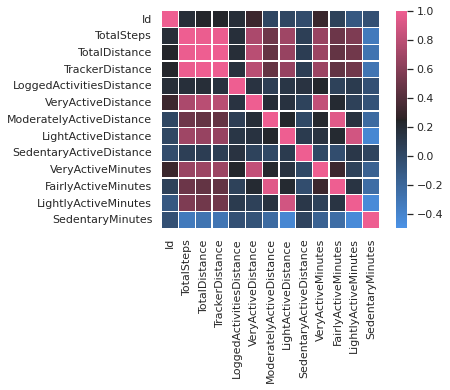

In [ ]:
corr = df_total.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

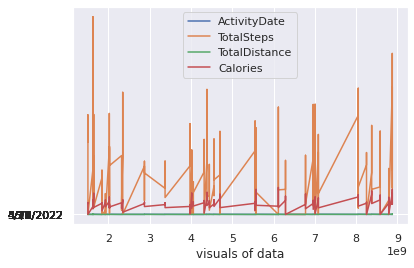

In [ ]:

Id = df_total['Id']
Ad = df_total['ActivityDate']
Ts = df_total['TotalSteps']
Td = df_total['TotalDistance']
Ca = df_total['Calories']

plt.plot(Id, Ad, label="ActivityDate")
plt.plot(Id, Ts, label="TotalSteps")
plt.plot(Id, Td, label="TotalDistance")
plt.plot(Id, Ca, label="Calories")



plt.legend()
plt.title('')
plt.ylabel('')
plt.xlabel('visuals of data')

plt.savefig("plot.png")

plt.show()

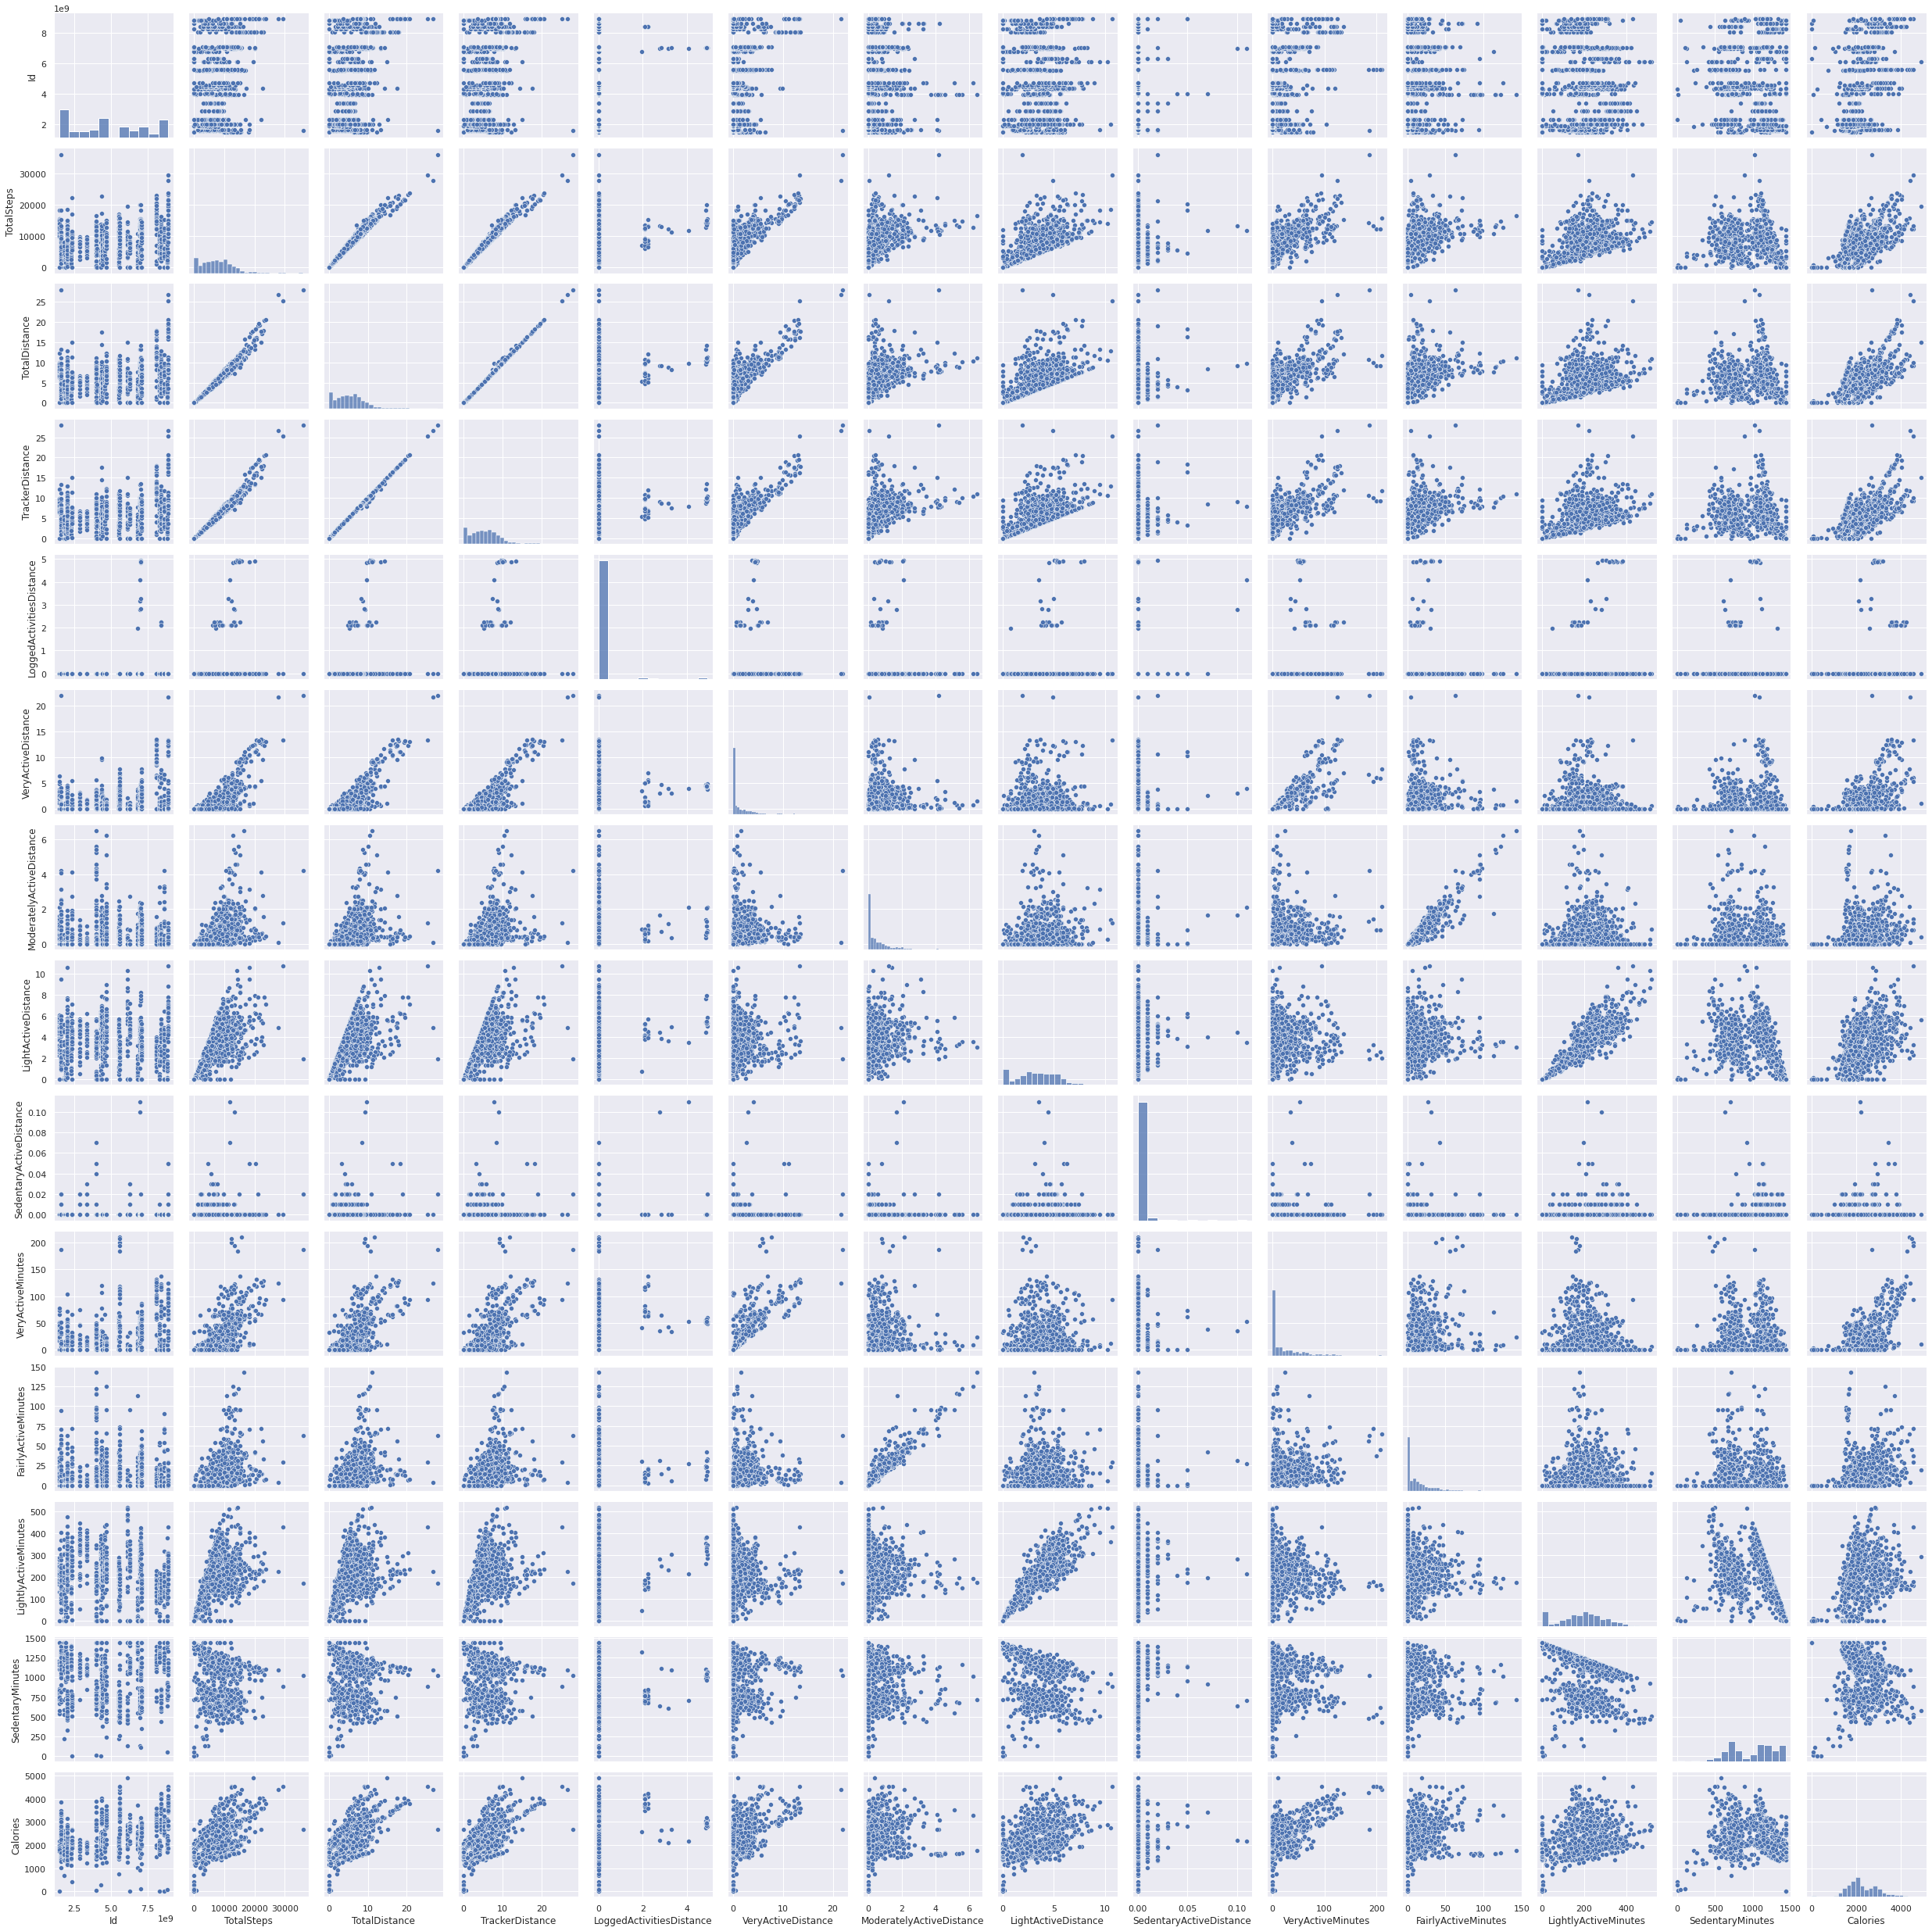

In [ ]:
sns.pairplot(data=df_total)

COMPARISON OF MAIN SUBJECT AND PEER COMMUNITY


In [ ]:
df_total.shape

(940, 15)

In [ ]:
df_total

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366    4/12/2022       13162       8.500000         8.500000   
1    1503960366    4/13/2022       10735       6.970000         6.970000   
2    1503960366    4/14/2022       10460       6.740000         6.740000   
3    1503960366    4/15/2022        9762       6.280000         6.280000   
4    1503960366    4/16/2022       12669       8.160000         8.160000   
..          ...          ...         ...            ...              ...   
935  8877689391     5/8/2022       10686       8.110000         8.110000   
936  8877689391     5/9/2022       20226      18.250000        18.250000   
937  8877689391    5/10/2022       10733       8.150000         8.150000   
938  8877689391    5/11/2022       21420      19.559999        19.559999   
939  8877689391    5/12/2022        8064       6.120000         6.120000   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                         0.0                1.88                      0.55   
1                         0.0                1.57                      0.69   
2                         0.0                2.44                      0.40   
3                         0.0                2.14                      1.26   
4                         0.0                2.71                      0.41   
..                        ...                 ...                       ...   
935                       0.0                1.08                      0.20   
936                       0.0               11.10                      0.80   
937                       0.0                1.35                      0.46   
938                       0.0               13.22                      0.41   
939                       0.0                1.82                      0.04   

     LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                   6.06                     0.00                 25   
1                   4.71                     0.00                 21   
2                   3.91                     0.00                 30   
3                   2.83                     0.00                 29   
4                   5.04                     0.00                 36   
..                   ...                      ...                ...   
935                 6.80                     0.00                 17   
936                 6.24                     0.05                 73   
937                 6.28                     0.00                 18   
938                 5.89                     0.00                 88   
939                 4.25                     0.00                 23   

     FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  
0                     13                   328               728      1985  
1                     19                   217               776      1797  
2                     11                   181              1218      1776  
3                     34                   209               726      1745  
4                     10                   221               773      1863  
..                   ...                   ...               ...       ...  
935                    4                   245              1174      2847  
936                   19                   217              1131      3710  
937                   11                   224              1187      2832  
938                   12                   213              1127      3832  
939                    1                   137               770      1849  

[940 rows x 15 columns]

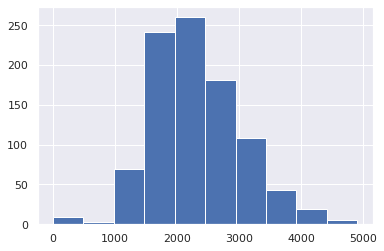

In [ ]:
df_total["Calories"].hist()

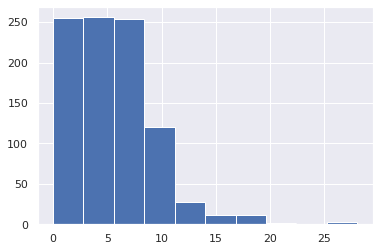

In [ ]:
df_total["TotalDistance"].hist()

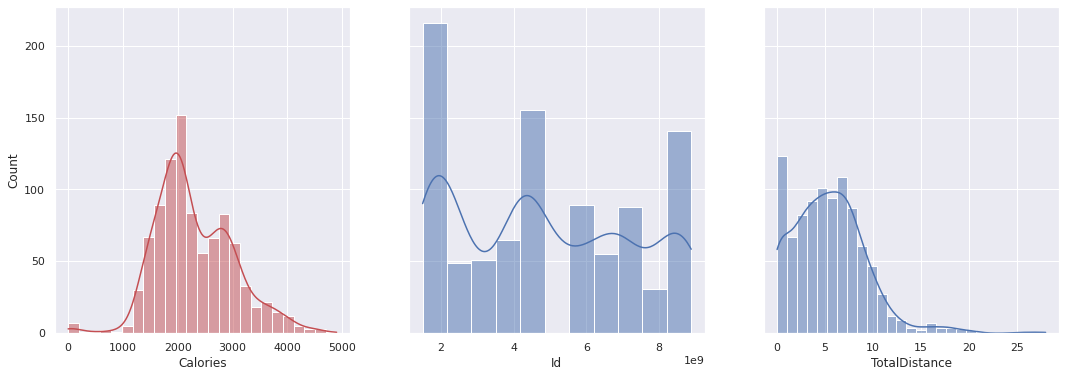

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(df_total, ax=axes[0], x="Calories", kde=True, color='r')
sns.histplot(df_total, ax=axes[1], x="Id", kde=True, color='b')
sns.histplot(df_total, ax=axes[2], x="TotalDistance", kde=True)

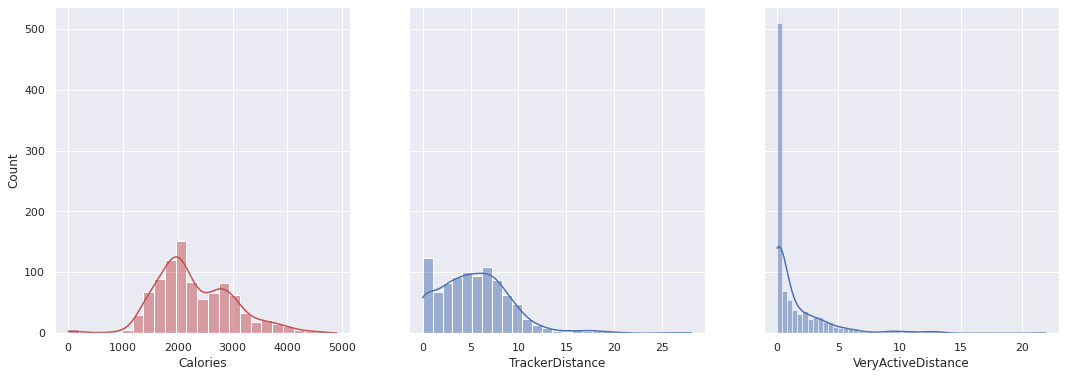

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(df_total, ax=axes[0], x="Calories", kde=True, color='r')
sns.histplot(df_total, ax=axes[1], x="TrackerDistance", kde=True, color='b')
sns.histplot(df_total, ax=axes[2], x="VeryActiveDistance", kde=True)

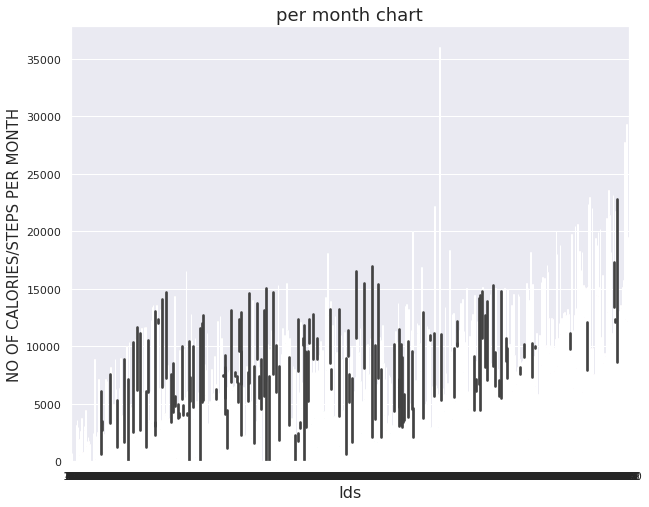

In [ ]:
#Show Bar Chart
plt.figure(figsize=(10,8))
sns.barplot(data=df_total, x='Calories', y='TotalSteps')
plt.title('per month chart', fontsize=18)
plt.xlabel ('Ids', fontsize=16)
plt.ylabel ('NO OF CALORIES/STEPS PER MONTH', fontsize=15)
plt.show()

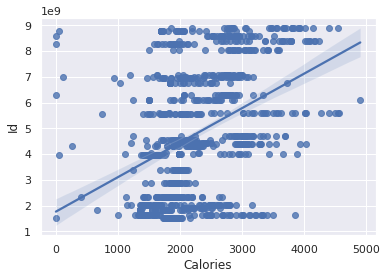

In [ ]:
sns.regplot(x="Calories", y="Id", data=df_total);

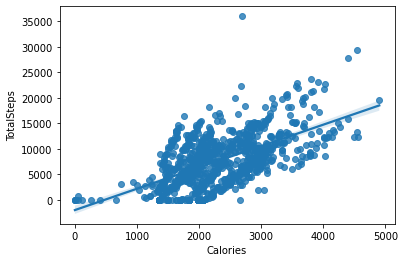

In [ ]:
df_total = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/msc project dataset 2022/dailyactivitytotal.csv')
df_total.head(1000)
sns.regplot(x="Calories", y="TotalSteps", data=df_total);

In [ ]:
import pandas as pd
df_heart = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/msc project dataset 2022/heartrate_seconds.csv')
df_heart.head(100000000)

Id                  Time  Value
0        2022484408  4/12/2022 7:21:00 AM     97
1        2022484408  4/12/2022 7:21:05 AM    102
2        2022484408  4/12/2022 7:21:10 AM    105
3        2022484408  4/12/2022 7:21:20 AM    103
4        2022484408  4/12/2022 7:21:25 AM    101
...             ...                   ...    ...
2483653  8877689391  5/12/2022 2:43:53 PM     57
2483654  8877689391  5/12/2022 2:43:58 PM     56
2483655  8877689391  5/12/2022 2:44:03 PM     55
2483656  8877689391  5/12/2022 2:44:18 PM     55
2483657  8877689391  5/12/2022 2:44:28 PM     56

[2483658 rows x 3 columns]

In [ ]:
total2=df_heart.isnull().sum().sort_values(ascending=False)
print(total2)

Id       0
Time     0
Value    0
dtype: int64


In [ ]:
df_inten = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/msc project dataset 2022/dailyintensities.csv')
df_inten.head(1000)

Id ActivityDay  SedentaryMinutes  LightlyActiveMinutes  \
0    1503960366   4/12/2022               728                   328   
1    1503960366   4/13/2022               776                   217   
2    1503960366   4/14/2022              1218                   181   
3    1503960366   4/15/2022               726                   209   
4    1503960366   4/16/2022               773                   221   
..          ...         ...               ...                   ...   
935  8877689391    5/8/2022              1174                   245   
936  8877689391    5/9/2022              1131                   217   
937  8877689391   5/10/2022              1187                   224   
938  8877689391   5/11/2022              1127                   213   
939  8877689391   5/12/2022               770                   137   

     FairlyActiveMinutes  VeryActiveMinutes  SedentaryActiveDistance  \
0                     13                 25                     0.00   
1                     19                 21                     0.00   
2                     11                 30                     0.00   
3                     34                 29                     0.00   
4                     10                 36                     0.00   
..                   ...                ...                      ...   
935                    4                 17                     0.00   
936                   19                 73                     0.05   
937                   11                 18                     0.00   
938                   12                 88                     0.00   
939                    1                 23                     0.00   

     LightActiveDistance  ModeratelyActiveDistance  VeryActiveDistance  
0                   6.06                      0.55                1.88  
1                   4.71                      0.69                1.57  
2                   3.91                      0.40                2.44  
3                   2.83                      1.26                2.14  
4                   5.04                      0.41                2.71  
..                   ...                       ...                 ...  
935                 6.80                      0.20                1.08  
936                 6.24                      0.80               11.10  
937                 6.28                      0.46                1.35  
938                 5.89                      0.41               13.22  
939                 4.25                      0.04                1.82  

[940 rows x 10 columns]

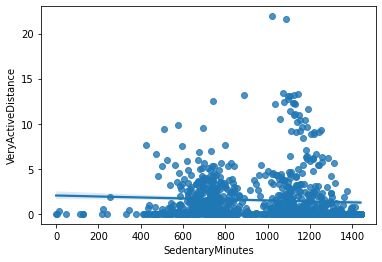

In [ ]:
sns.regplot(x="SedentaryMinutes", y="VeryActiveDistance", data=df_inten);

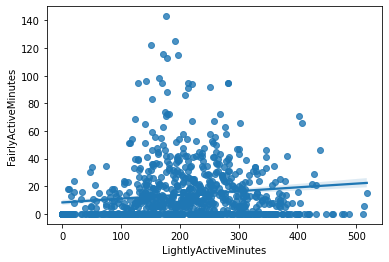

In [ ]:
sns.regplot(x="LightlyActiveMinutes", y="FairlyActiveMinutes", data=df_inten);

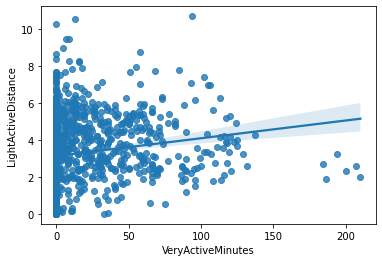

In [ ]:
sns.regplot(x="VeryActiveMinutes", y="LightActiveDistance", data=df_inten);

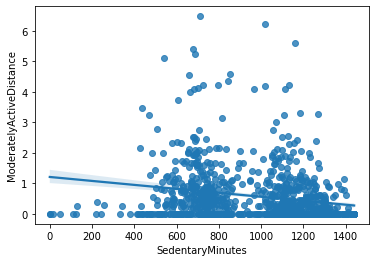

In [ ]:
sns.regplot(x="SedentaryMinutes", y="ModeratelyActiveDistance", data=df_inten);

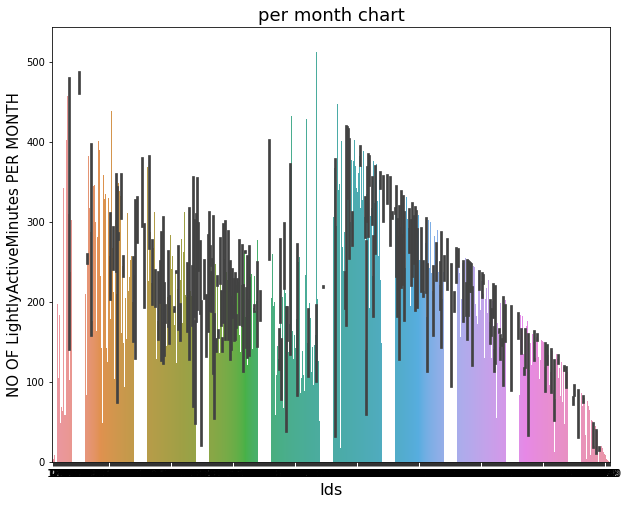

In [ ]:
#Show Bar Chart
plt.figure(figsize=(10,8))
sns.barplot(data=df_inten, x='SedentaryMinutes', y='LightlyActiveMinutes')
plt.title('per month chart', fontsize=18)
plt.xlabel ('Ids', fontsize=16)
plt.ylabel ('NO OF LightlyActiveMinutes PER MONTH', fontsize=15)
plt.show()

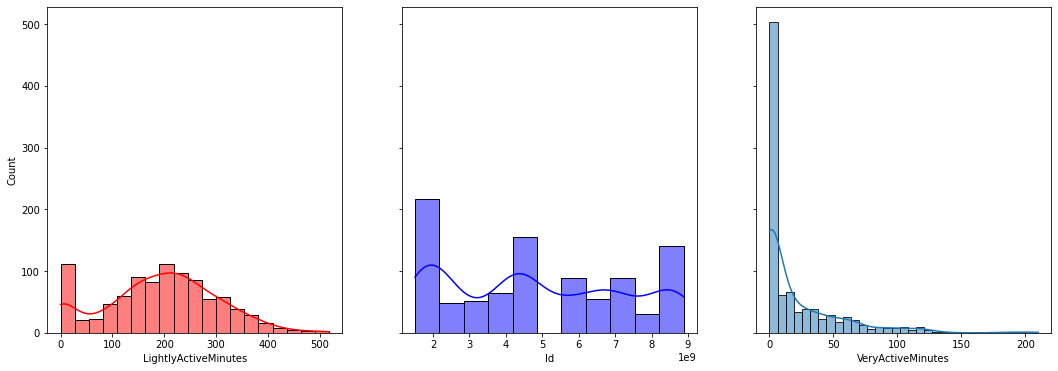

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(df_inten, ax=axes[0], x="LightlyActiveMinutes", kde=True, color='r')
sns.histplot(df_inten, ax=axes[1], x="Id", kde=True, color='b')
sns.histplot(df_inten, ax=axes[2], x="VeryActiveMinutes", kde=True)

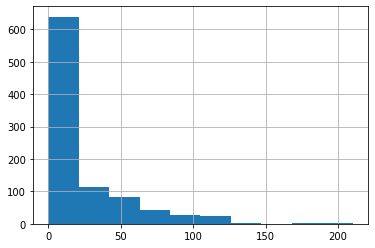

In [ ]:
df_inten["VeryActiveMinutes"].hist()

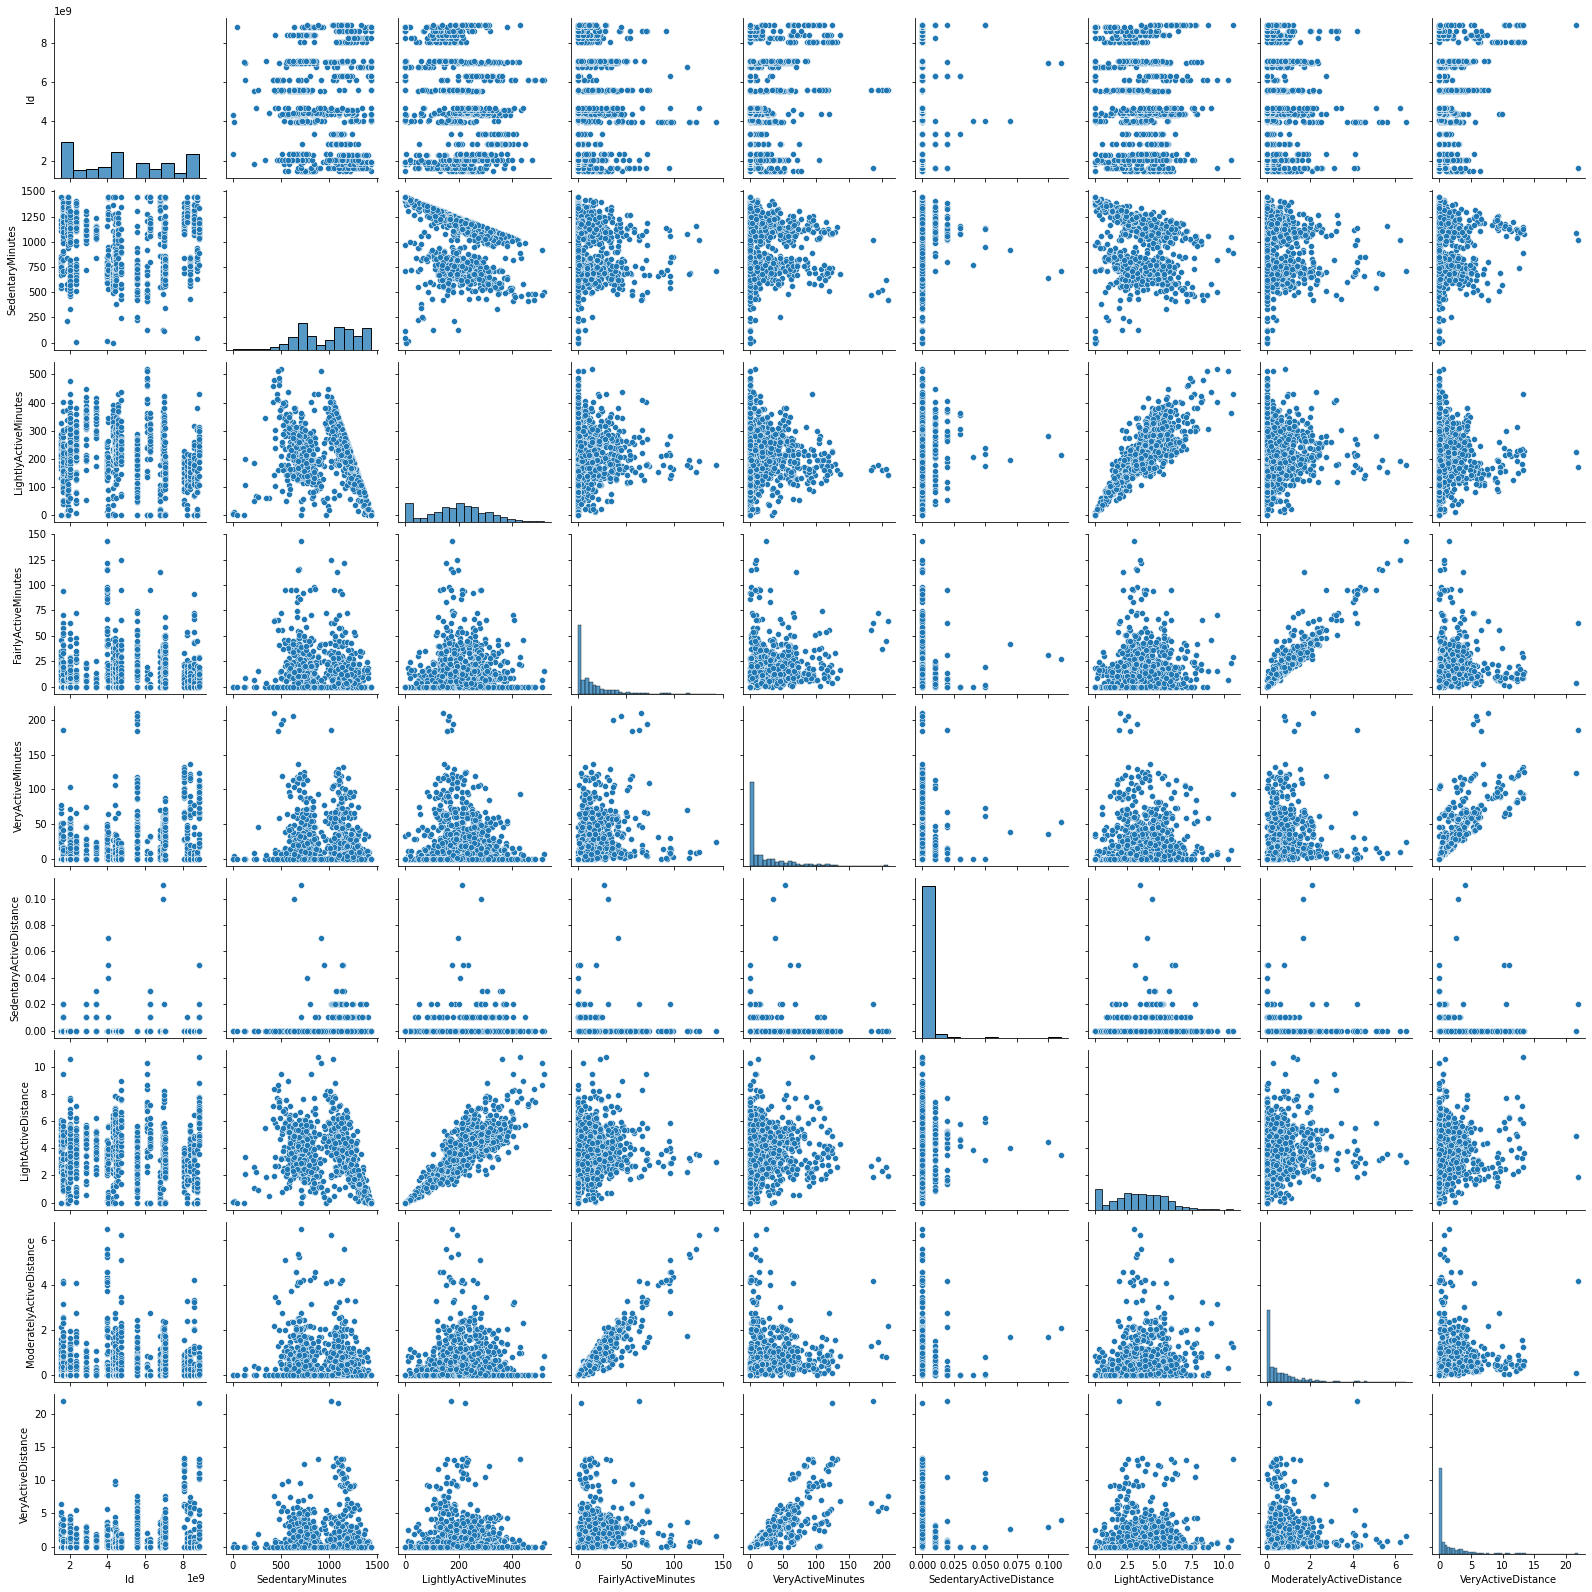

In [ ]:
sns.pairplot(data=df_inten)

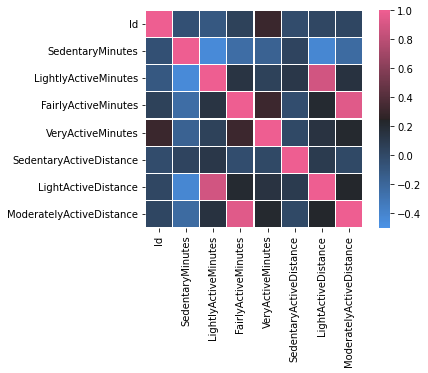

In [ ]:
corr = df_inten.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

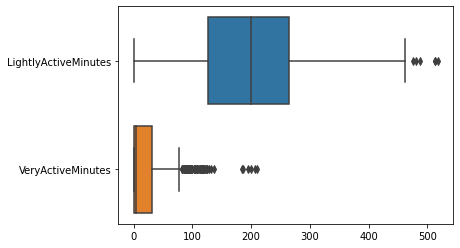

In [ ]:
data4=['LightlyActiveMinutes','VeryActiveMinutes']
ax=sns.boxplot(data=df_inten[data4],orient='h')

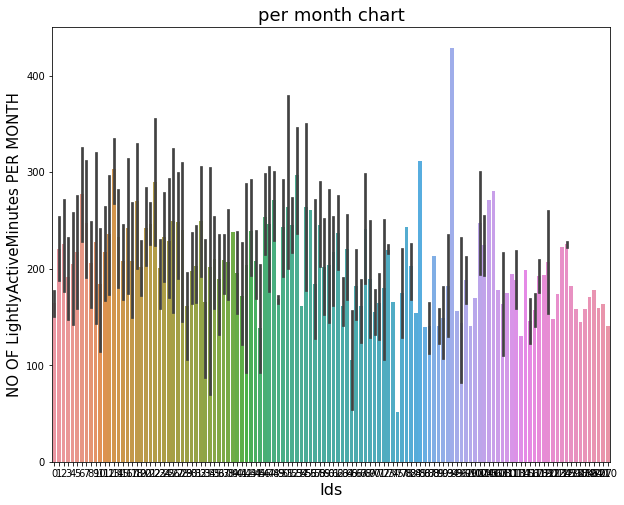

In [ ]:
#Show Bar Chart
plt.figure(figsize=(10,8))
sns.barplot(data=df_inten, x='VeryActiveMinutes', y='LightlyActiveMinutes')
plt.title('per month chart', fontsize=18)
plt.xlabel ('Ids', fontsize=16)
plt.ylabel ('NO OF LightlyActiveMinutes PER MONTH', fontsize=15)
plt.show()

In [ ]:
df_steps = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/msc project dataset 2022/dailysteps.csv')
df_steps.head(1000)

Id ActivityDay  StepTotal
0    1503960366   4/12/2022      13162
1    1503960366   4/13/2022      10735
2    1503960366   4/14/2022      10460
3    1503960366   4/15/2022       9762
4    1503960366   4/16/2022      12669
..          ...         ...        ...
935  8877689391    5/8/2022      10686
936  8877689391    5/9/2022      20226
937  8877689391   5/10/2022      10733
938  8877689391   5/11/2022      21420
939  8877689391   5/12/2022       8064

[940 rows x 3 columns]

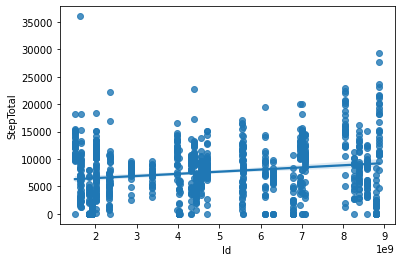

In [ ]:
sns.regplot(x="Id", y="StepTotal", data=df_steps);

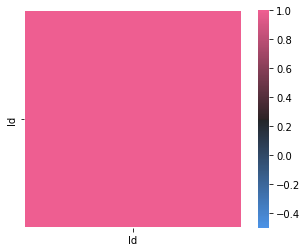

In [ ]:
corr = df_steps.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

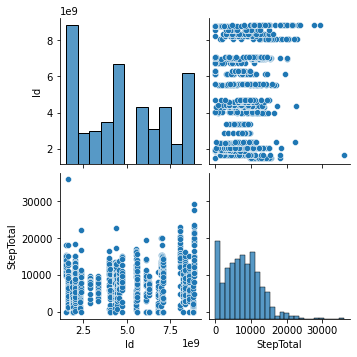

In [ ]:
sns.pairplot(data=df_steps)

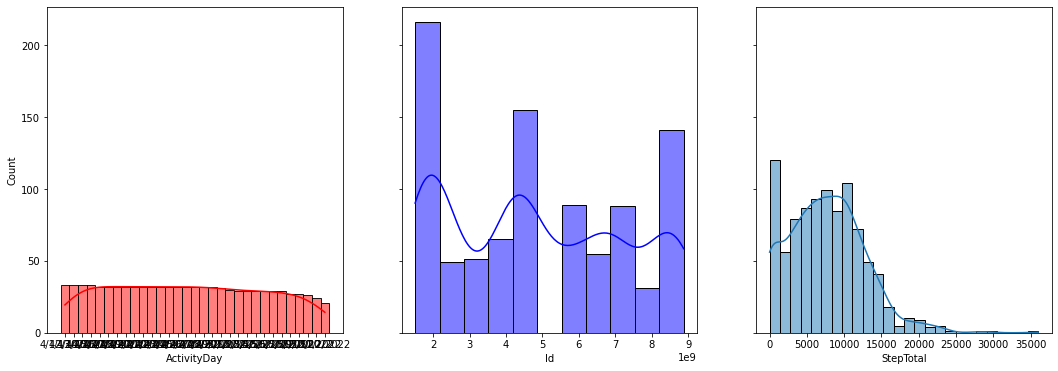

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(df_steps, ax=axes[0], x="ActivityDay", kde=True, color='r')
sns.histplot(df_steps, ax=axes[1], x="Id", kde=True, color='b')
sns.histplot(df_steps, ax=axes[2], x="StepTotal", kde=True)

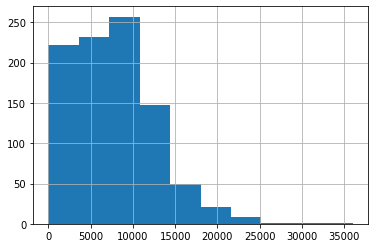

In [ ]:
df_steps["StepTotal"].hist()

In [ ]:
df_sleep = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/msc project dataset 2022/sleepday.csv')
df_sleep.head(1000)

hId               SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
0    1503960366  4/12/2022 12:00:00 AM                  1                 327   
1    1503960366  4/13/2022 12:00:00 AM                  2                 384   
2    1503960366  4/15/2022 12:00:00 AM                  1                 412   
3    1503960366  4/16/2022 12:00:00 AM                  2                 340   
4    1503960366  4/17/2022 12:00:00 AM                  1                 700   
..          ...                    ...                ...                 ...   
408  8792009665  4/30/2022 12:00:00 AM                  1                 343   
409  8792009665   5/1/2022 12:00:00 AM                  1                 503   
410  8792009665   5/2/2022 12:00:00 AM                  1                 415   
411  8792009665   5/3/2022 12:00:00 AM                  1                 516   
412  8792009665   5/4/2022 12:00:00 AM                  1                 439   

     TotalTimeInBed  
0               346  
1               407  
2               442  
3               367  
4               712  
..              ...  
408             360  
409             527  
410             423  
411             545  
412             463  

[413 rows x 5 columns]

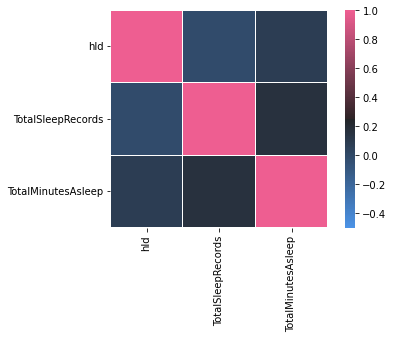

In [ ]:
corr = df_sleep.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

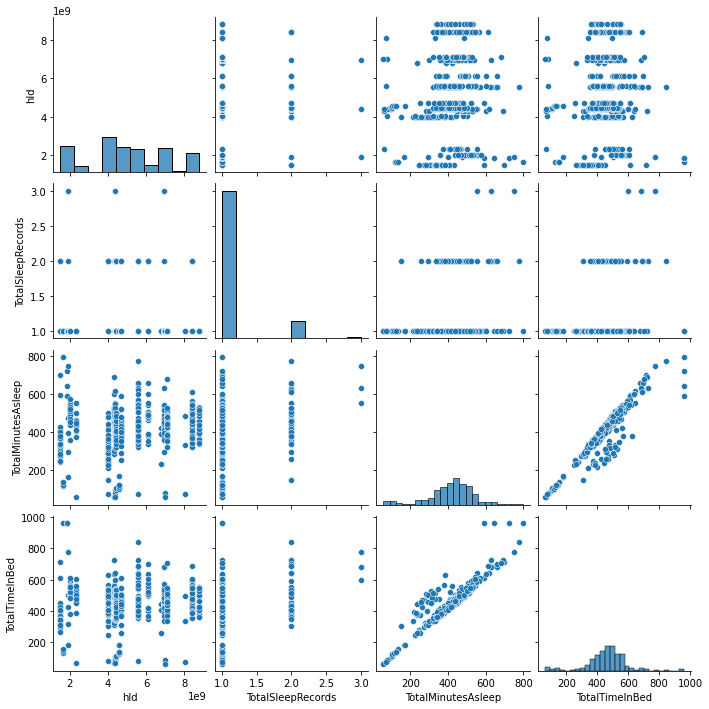

In [ ]:
sns.pairplot(data=df_sleep)

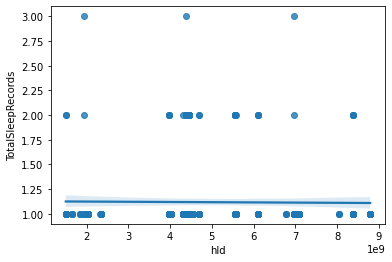

In [ ]:
sns.regplot(x="hId", y="TotalSleepRecords", data=df_sleep);

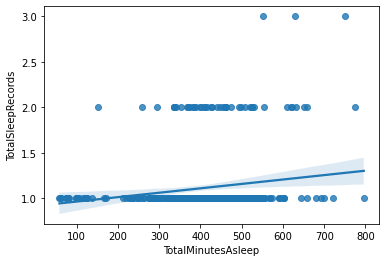

In [ ]:
sns.regplot(x="TotalMinutesAsleep", y="TotalSleepRecords", data=df_sleep);

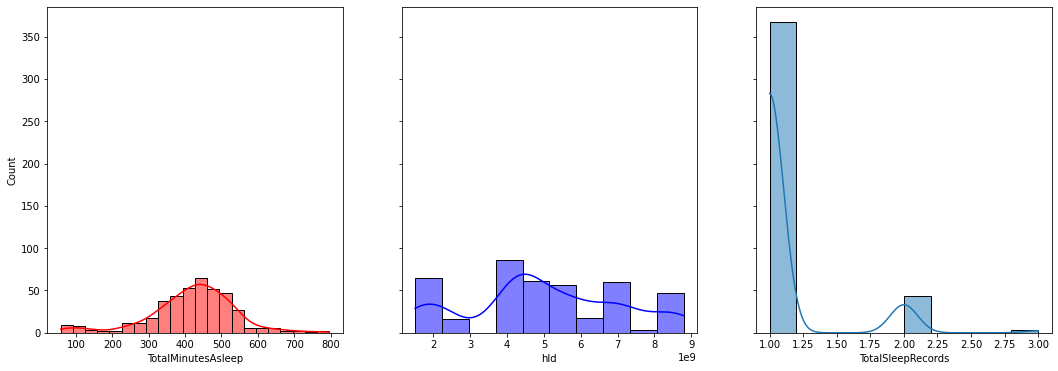

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(df_sleep, ax=axes[0], x="TotalMinutesAsleep", kde=True, color='r')
sns.histplot(df_sleep, ax=axes[1], x="hId", kde=True, color='b')
sns.histplot(df_sleep, ax=axes[2], x="TotalSleepRecords", kde=True)

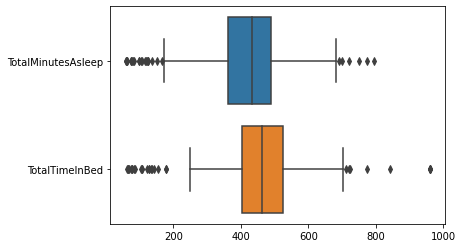

In [ ]:
data5=['TotalMinutesAsleep','TotalTimeInBed']
ax=sns.boxplot(data=df_sleep[data5],orient='h')

In [ ]:
df_wei = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/msc project dataset 2022/weightlogInfo.csv')
df_wei.head(1000)

Id                   Date    WeightKg  WeightPounds   Fat  \
0   1503960366   5/2/2022 11:59:59 PM   52.599998    115.963147  22.0   
1   1503960366   5/3/2022 11:59:59 PM   52.599998    115.963147   NaN   
2   1927972279   4/13/2022 1:08:52 AM  133.500000    294.317120   NaN   
3   2873212765  4/21/2022 11:59:59 PM   56.700001    125.002104   NaN   
4   2873212765  5/12/2022 11:59:59 PM   57.299999    126.324875   NaN   
..         ...                    ...         ...           ...   ...   
62  8877689391    5/6/2022 6:43:35 AM   85.000000    187.392923   NaN   
63  8877689391    5/8/2022 7:35:53 AM   85.400002    188.274775   NaN   
64  8877689391    5/9/2022 6:39:44 AM   85.500000    188.495234   NaN   
65  8877689391   5/11/2022 6:51:47 AM   85.400002    188.274775   NaN   
66  8877689391   5/12/2022 6:42:53 AM   84.000000    185.188300   NaN   

          BMI  IsManualReport          LogId  
0   22.650000            True  1462233599000  
1   22.650000            True  1462319999000  
2   47.540001           False  1460509732000  
3   21.450001            True  1461283199000  
4   21.690001            True  1463097599000  
..        ...             ...            ...  
62  25.440001           False  1462517015000  
63  25.559999           False  1462692953000  
64  25.610001           False  1462775984000  
65  25.559999           False  1462949507000  
66  25.139999           False  1463035373000  

[67 rows x 8 columns]

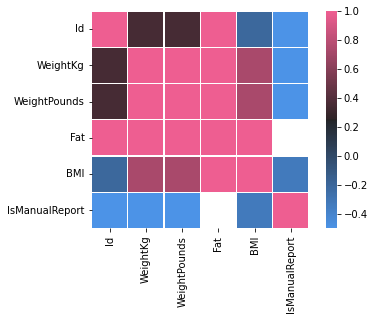

In [ ]:
corr = df_wei.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

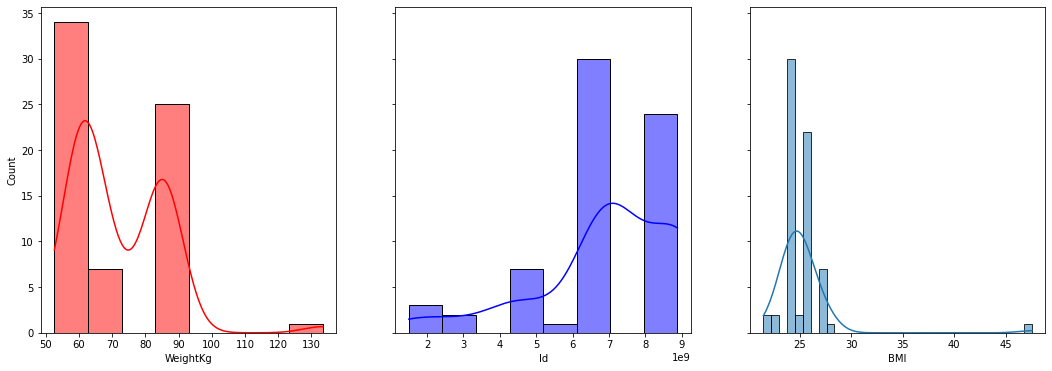

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(df_wei, ax=axes[0], x="WeightKg", kde=True, color='r')
sns.histplot(df_wei, ax=axes[1], x="Id", kde=True, color='b')
sns.histplot(df_wei, ax=axes[2], x="BMI", kde=True)

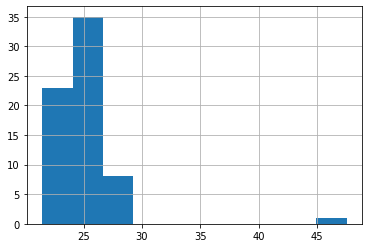

In [ ]:
df_wei["BMI"].hist()

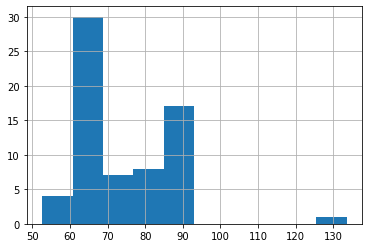

In [ ]:
df_wei["WeightKg"].hist()

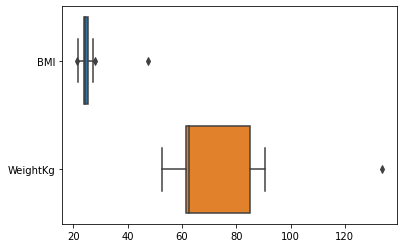

In [ ]:
data6=['BMI','WeightKg']
ax=sns.boxplot(data=df_wei[data6],orient='h')

In [ ]:
df_wei.shape

(67, 8)

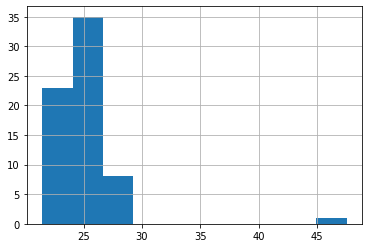

In [ ]:
df_wei["BMI"].hist()

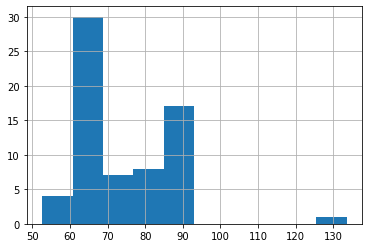

In [ ]:
df_wei["WeightKg"].hist()

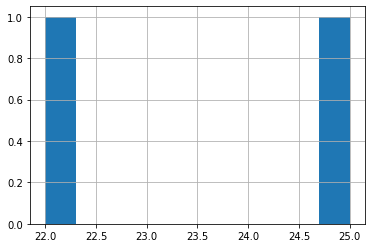

In [ ]:
df_wei["Fat"].hist()